In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [3]:
five = data[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()
five

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [4]:
AMZN = pd.DataFrame(data['AMZN.O'].dropna())
AMZN

,AMZN.O
Date,
2010-01-04,133.90
2010-01-05,134.69
2010-01-06,132.25
2010-01-07,130.00
2010-01-08,133.52
...,...
2018-06-25,1663.15
2018-06-26,1691.09
2018-06-27,1660.51


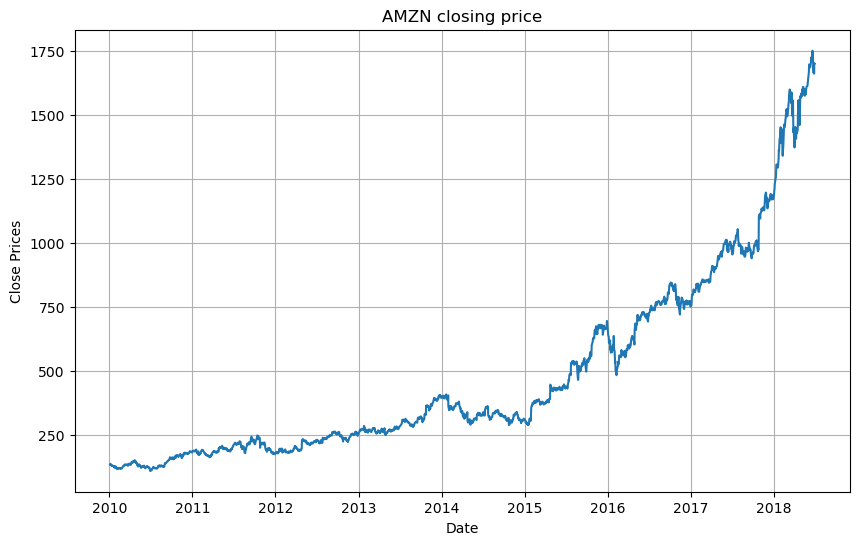

In [5]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(AMZN)
plt.title('AMZN closing price')
plt.show()

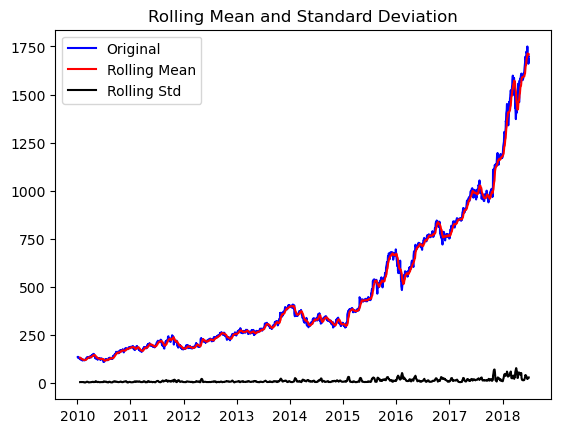

Results of dickey fuller test
Test Statistics                   3.807832
p-value                           1.000000
No. of lags used                 13.000000
Number of observations used    2124.000000
critical value (1%)              -3.433432
critical value (5%)              -2.862902
critical value (10%)             -2.567495
dtype: float64


In [6]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(AMZN)

# https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima

<Figure size 640x480 with 0 Axes>

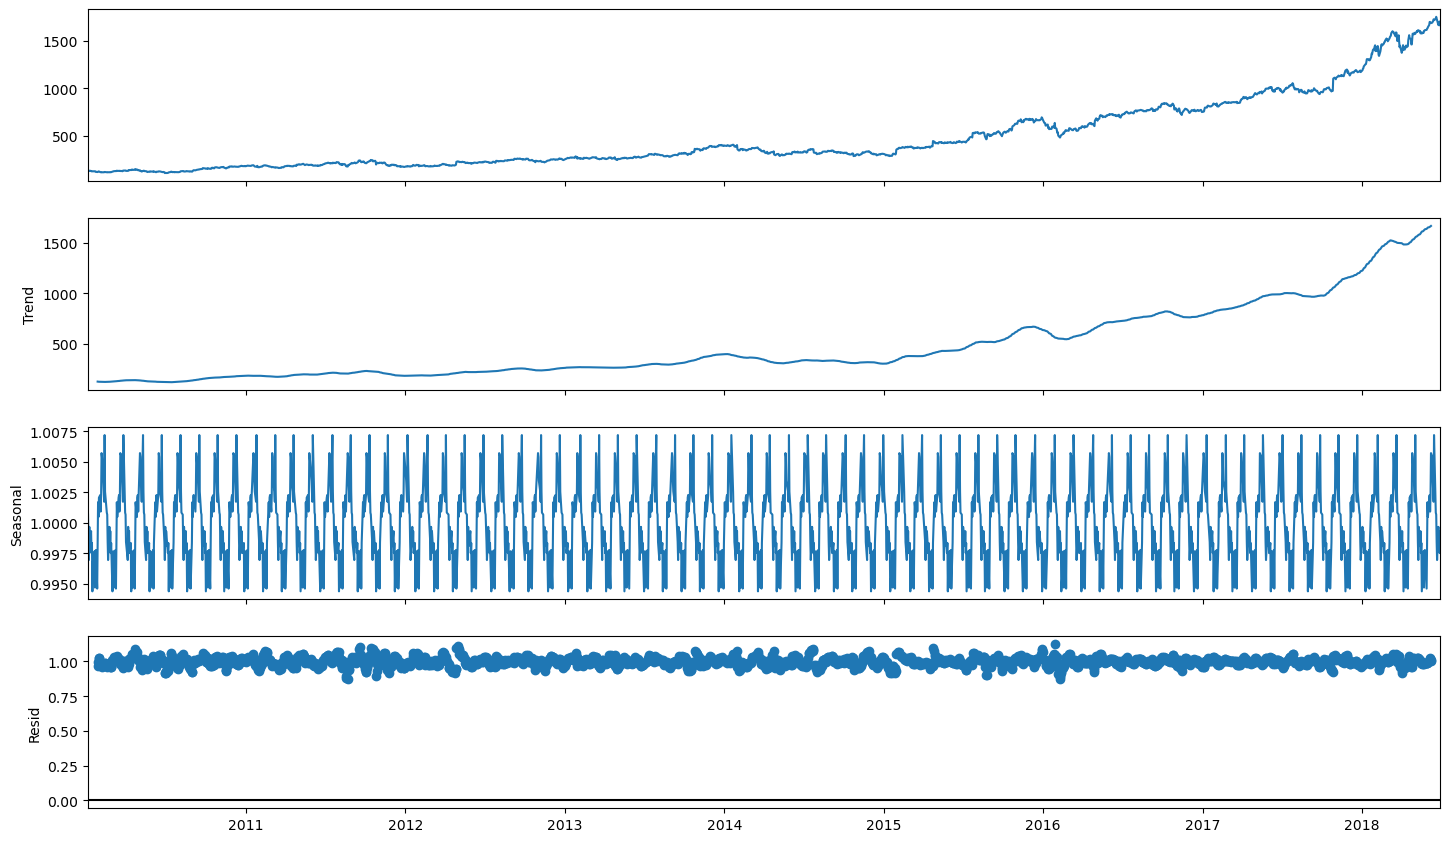

In [7]:
# To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
result = seasonal_decompose(AMZN, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

In [8]:
# Split data into train and test sets
X = AMZN.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

## the Auto ARIMA model provided the optimal parameters p,d, and q as 0, 1 and 0 respectively

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (2) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11494.879, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11490.883, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11492.853, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11492.853, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11494.427, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.293 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1710
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5743.442
Date:                Wed, 10 Apr 2024   AIC                          11490.883
Time:                        23:55:29   BIC                          11501.771
Sample:                             0   HQIC                         11494.913
                               - 1710                                  

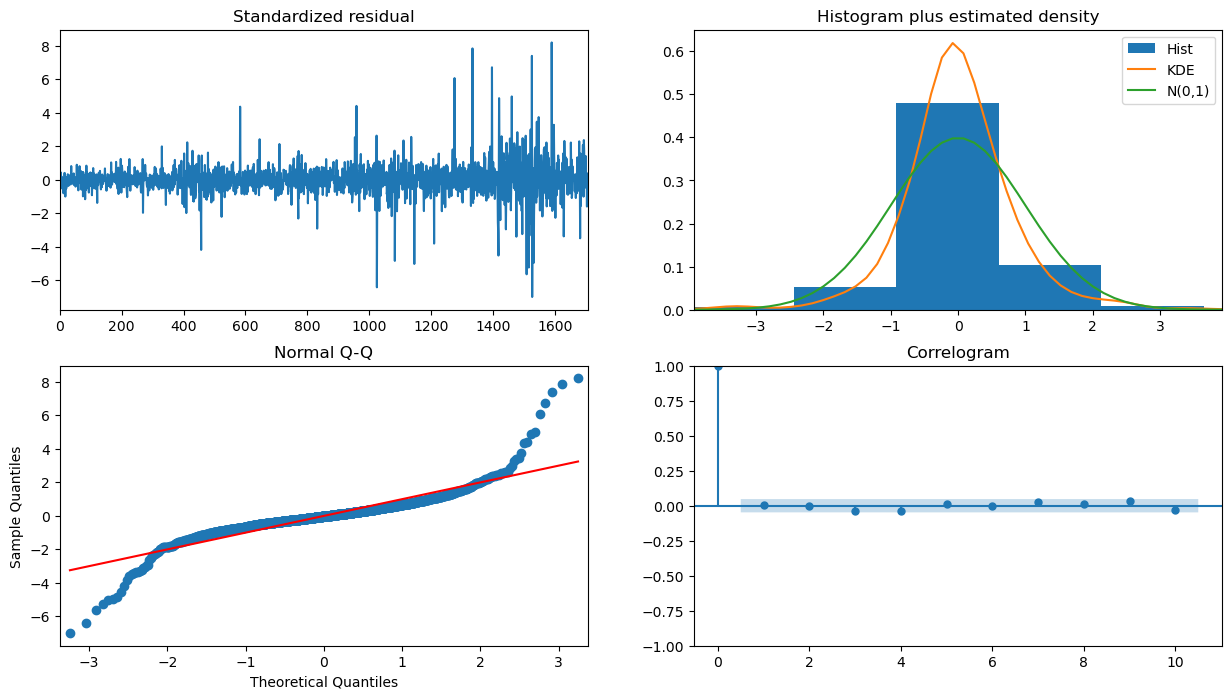

In [9]:
model_autoARIMA = auto_arima(train, start_p=1, start_q=1,test='adf',max_p=4, max_q=4,
                      m=2,d=None,seasonal=False,start_P=1,D=2,trace=True,error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima/notebook

In [10]:
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

In [11]:
# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

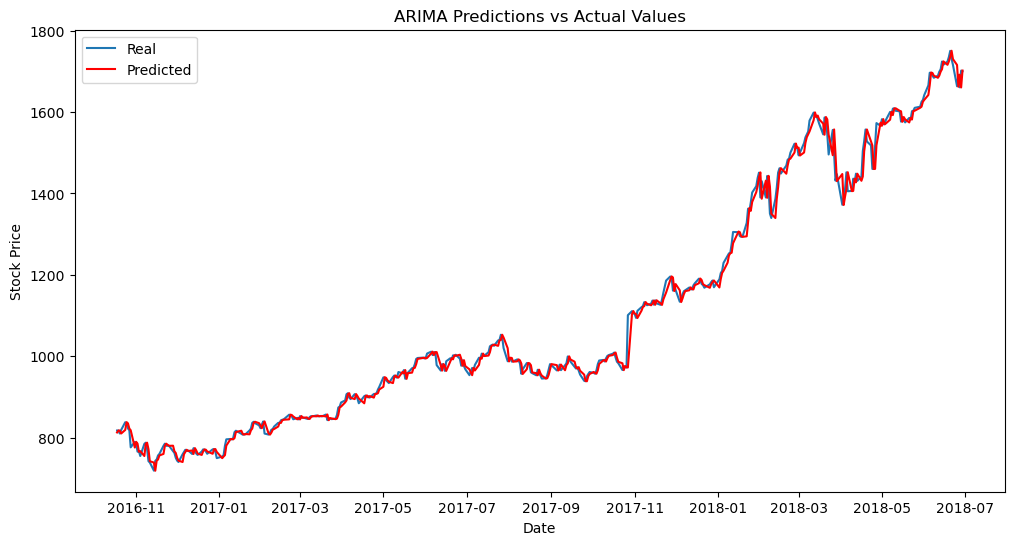

In [13]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(AMZN.iloc[size:,:].index, test, label='Real')
plt.plot(AMZN.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

In [14]:
np.mean(np.abs(predictions - test)/np.abs(test))

0.2932751905719097

In [15]:
AMZN_test = AMZN.iloc[size:len(X)]
AMZN_test.loc[:,'Ari_Pred_Price'] = predictions # stock price predicted by ARIMA
# Benchmark returns
AMZN_test['Returns'] = np.log(AMZN_test['AMZN.O']/AMZN_test['AMZN.O'].shift(1))
# Returns predicted by Arima
AMZN_test['Ari_pred_ret'] = np.log(AMZN_test['Ari_Pred_Price']/AMZN_test['Ari_Pred_Price'].shift(1))
# direction predicted by Arima
AMZN_test['Ari_pred_dir'] = np.sign(AMZN_test['Ari_Pred_Price']-AMZN_test['AMZN.O'].shift(1))
AMZN_test.dropna(inplace = True)
# long when predicted direction is +1, vice versa, then compute returns
AMZN_test['Ari_ret'] = AMZN_test['Ari_pred_dir'] * AMZN_test['Returns']
AMZN_test

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\588317140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test.loc[:,'Ari_Pred_Price'] = predictions # stock price predicted by ARIMA
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\588317140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test['Returns'] = np.log(AMZN_test['AMZN.O']/AMZN_test['AMZN.O'].shift(1))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\588317140.py:6: SettingWithCopyWarning: 


,AMZN.O,Ari_Pred_Price,Returns,Ari_pred_ret,Ari_pred_dir,Ari_ret
Date,,,,,,
2016-10-19,817.69,817.682829,0.000049,0.005896,1.0,0.000049
2016-10-20,810.32,817.690049,-0.009054,0.000009,1.0,-0.009054
2016-10-21,818.99,810.269244,0.010643,-0.009117,-1.0,-0.010643
2016-10-24,838.09,819.043305,0.023054,0.010770,1.0,0.023054
2016-10-25,835.18,838.244531,-0.003478,0.023173,1.0,-0.003478
...,...,...,...,...,...,...
2018-06-25,1663.15,1715.394583,-0.031090,-0.008395,-1.0,0.031090
2018-06-26,1691.09,1661.961388,0.016660,-0.031645,-1.0,-0.016660
2018-06-27,1660.51,1691.545302,-0.018249,0.017644,1.0,-0.018249


In [16]:
# Compare total returns from arima with benchmark
AMZN_test[['Returns', 'Ari_ret']].sum().apply(np.exp)

Returns    2.078885
Ari_ret    1.109354
dtype: float64

Text(0.5, 1.0, 'AMZN')

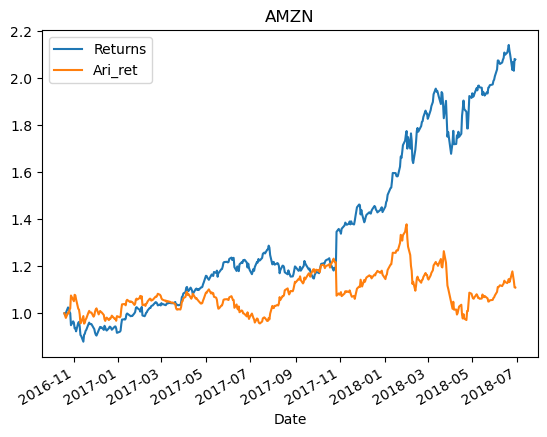

In [17]:
# plot the cumulative returns
AMZN_test[['Returns', 'Ari_ret']].cumsum().apply(np.exp).plot()
plt.title('AMZN')

<Axes: xlabel='Date'>

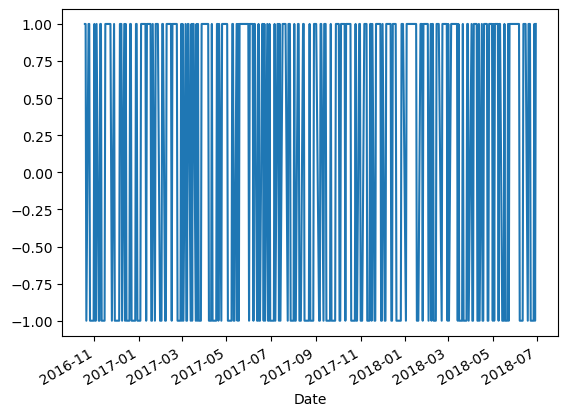

In [18]:
AMZN_test['Ari_pred_dir'].plot()

In [19]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as spi
import statsmodels.api as sm
from itertools import product
import pymc as pm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [20]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col = 0, parse_dates = True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [21]:
vol = pd.DataFrame()
raw1 = yf.download(['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS'], start = '2010-01-01', end= '2018-06-30')
vol['AAPL.O'] = raw1['Volume']['AAPL']
vol['MSFT.O'] = raw1['Volume']['MSFT']
vol['INTC.O'] = raw1['Volume']['INTC']
vol['AMZN.O'] = raw1['Volume']['AMZN']
vol['GS.N'] = raw1['Volume']['GS']
vol

[*********************100%%**********************]  5 of 5 completed


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,493729600,38409100,47800900,151998000,9135000
2010-01-05,601904800,49749600,52357700,177038000,11659400
2010-01-06,552160000,58182400,40037400,143576000,7381100
2010-01-07,477131200,50559700,54041500,220604000,8727400
2010-01-08,447610800,51197400,48234700,196610000,7268100
...,...,...,...,...,...
2018-06-25,126652400,35433300,45356500,150224000,3817700
2018-06-26,98276800,26897200,37543000,87732000,2692900
2018-06-27,101141200,31298400,33338800,97444000,3104200


In [22]:
data = raw[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']]
data.dropna(inplace=True)
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\3340317063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [23]:
EWM = data.ewm(alpha=0.75 , min_periods = 20 , adjust = False).mean()
EWM

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-25,182.907462,98.947979,51.156661,1677.427439,222.738311
2018-06-26,184.049366,99.046995,50.041665,1687.674360,221.869578
2018-06-27,184.132341,97.916749,49.080416,1667.301090,220.602394


In [24]:
delta = data.diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
average_gain = gain.rolling(window=14, min_periods=14).mean()
average_loss = loss.rolling(window=14, min_periods=14).mean()
RS = average_gain / average_loss
RSI = 100 - (100 / (1 + RS))
RSI

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-25,16.036585,32.789855,22.390892,40.836829,33.669549
2018-06-26,23.457476,35.083115,16.787004,48.882494,18.621096
2018-06-27,23.788050,35.299296,17.158672,43.812062,11.311953


In [25]:
rets = np.log(data / data.shift(1))
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093
...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338


In [26]:
rets['AAPLvola'] = rets['AAPL.O'].rolling(14).std()
rets['INTCvola'] = rets['INTC.O'].rolling(14).std()
rets['MSFTvola'] = rets['MSFT.O'].rolling(14).std()
rets['AMZNvola'] = rets['AMZN.O'].rolling(14).std()
rets['GSvola'] = rets['GS.N'].rolling(14).std()
rets['AAPLvolat'] = rets['AAPL.O'].rolling(42).std()
rets['INTCvolat'] = rets['INTC.O'].rolling(42).std()
rets['MSFTvolat'] = rets['MSFT.O'].rolling(42).std()
rets['AMZNvolat'] = rets['AMZN.O'].rolling(42).std()
rets['GSvolat'] = rets['GS.N'].rolling(42).std()
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,AAPLvola,INTCvola,MSFTvola,AMZNvola,GSvola,AAPLvolat,INTCvolat,MSFTvolat,AMZNvolat,GSvolat
Date,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,0.006855,0.015982,0.009350,0.010747,0.008766,0.012230,0.016184,0.010550,0.011721,0.009592
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.007945,0.015571,0.009598,0.011787,0.006914,0.012322,0.015653,0.010136,0.010510,0.009559
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,0.007963,0.015481,0.009580,0.012722,0.006486,0.012131,0.015856,0.010170,0.009650,0.009583


In [27]:
data['RSI_Signal_AAPL.O'] = np.where(RSI['AAPL.O'] < 30, 1, np.where(RSI['AAPL.O'] > 70, -1, 0))
data['RSI_Signal_MSFT.O'] = np.where(RSI['MSFT.O'] < 30, 1, np.where(RSI['MSFT.O'] > 70, -1, 0))
data['RSI_Signal_INTC.O'] = np.where(RSI['INTC.O'] < 30, 1, np.where(RSI['INTC.O'] > 70, -1, 0))
data['RSI_Signal_AMZN.O'] = np.where(RSI['AMZN.O'] < 30, 1, np.where(RSI['AMZN.O'] > 70, -1, 0))
data['RSI_Signal_GS.N'] = np.where(RSI['GS.N'] < 30, 1, np.where(RSI['GS.N'] > 70, -1, 0))
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\4205982714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI_Signal_AAPL.O'] = np.where(RSI['AAPL.O'] < 30, 1, np.where(RSI['AAPL.O'] > 70, -1, 0))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\4205982714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI_Signal_MSFT.O'] = np.where(RSI['MSFT.O'] < 30, 1, np.where(RSI['MSFT.O'] > 70, -1, 0))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\420598

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,RSI_Signal_AAPL.O,RSI_Signal_MSFT.O,RSI_Signal_INTC.O,RSI_Signal_AMZN.O,RSI_Signal_GS.N
Date,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0,0,0,0,0
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0,0,0,0,0
2010-01-06,30.138541,30.770,20.80,132.25,174.26,0,0,0,0,0
2010-01-07,30.082827,30.452,20.60,130.00,177.67,0,0,0,0,0
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,1,0,1,0,0
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,1,0,1,0,1
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,1,0,1,0,1


In [28]:
AMZN = data[['AMZN.O']]

In [29]:
AMZN = pd.merge(AMZN, EWM['AMZN.O'], left_index=True, right_index=True, how='left')
AMZN = AMZN.rename(columns={'AMZN.O_x': 'close', "AMZN.O_y": "EWM"})
AMZN

,close,EWM
Date,,
2010-01-04,133.90,NaN
2010-01-05,134.69,NaN
2010-01-06,132.25,NaN
2010-01-07,130.00,NaN
2010-01-08,133.52,NaN
...,...,...
2018-06-25,1663.15,1677.427439
2018-06-26,1691.09,1687.674360
2018-06-27,1660.51,1667.301090


In [30]:
AMZN = pd.merge(AMZN, RSI['AMZN.O'], left_index=True, right_index=True, how='left')
AMZN = AMZN.rename(columns={"AMZN.O": "RSI"})
AMZN['return'] = np.log(AMZN['close'] / AMZN['close'].shift(1))
AMZN

,close,EWM,RSI,return
Date,,,,
2010-01-04,133.90,NaN,NaN,NaN
2010-01-05,134.69,NaN,NaN,0.005883
2010-01-06,132.25,NaN,NaN,-0.018282
2010-01-07,130.00,NaN,NaN,-0.017160
2010-01-08,133.52,NaN,NaN,0.026717
...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090
2018-06-26,1691.09,1687.674360,48.882494,0.016660
2018-06-27,1660.51,1667.301090,43.812062,-0.018249


In [31]:
AMZN['PnL'] = np.where(AMZN['return'] > 0, 1, -1)
AMZN

,close,EWM,RSI,return,PnL
Date,,,,,
2010-01-04,133.90,NaN,NaN,NaN,-1
2010-01-05,134.69,NaN,NaN,0.005883,1
2010-01-06,132.25,NaN,NaN,-0.018282,-1
2010-01-07,130.00,NaN,NaN,-0.017160,-1
2010-01-08,133.52,NaN,NaN,0.026717,1
...,...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090,-1
2018-06-26,1691.09,1687.674360,48.882494,0.016660,1
2018-06-27,1660.51,1667.301090,43.812062,-0.018249,-1


In [32]:
AMZN['RSI lag1'] = AMZN['RSI'].shift(1)
AMZN['RSI bin'] = pd.cut(AMZN['RSI'], bins=20, labels = False)
AMZN['RSI bin'] += 1
AMZN['RSI bin lag1'] = AMZN['RSI bin'].shift(1)
AMZN.dropna(inplace = True)
AMZN

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1
Date,,,,,,,,
2010-02-01,118.87,120.481121,31.357976,-0.053558,-1,35.173675,5.0,6.0
2010-02-02,118.12,118.710280,33.789954,-0.006329,-1,31.357976,6.0,5.0
2010-02-03,119.10,119.002570,31.924883,0.008262,1,33.789954,5.0,6.0
2010-02-04,115.94,116.705643,30.388450,-0.026891,-1,31.924883,5.0,5.0
2010-02-05,117.39,117.218911,33.926805,0.012429,1,30.388450,6.0,5.0
...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090,-1,65.777611,7.0,13.0
2018-06-26,1691.09,1687.674360,48.882494,0.016660,1,40.836829,9.0,7.0
2018-06-27,1660.51,1667.301090,43.812062,-0.018249,-1,48.882494,8.0,9.0


In [33]:
for i in range(1,6):
    colname = "lag" + str(i)
    AMZN[colname] = AMZN['return'].shift(i)

AMZN['EWM_normal'] = (AMZN['EWM'] - AMZN['EWM'].min()) / (AMZN['EWM'].max() - AMZN['EWM'].min())
AMZN['RSI normal'] = (AMZN['RSI'] - AMZN['RSI'].min()) / (AMZN['RSI'].max() - AMZN['RSI'].min())
AMZN

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,lag3,lag4,lag5,EWM_normal,RSI normal
Date,,,,,,,,,,,,,,,
2010-02-01,118.87,120.481121,31.357976,-0.053558,-1,35.173675,5.0,6.0,NaN,NaN,NaN,NaN,NaN,0.006702,0.228039
2010-02-02,118.12,118.710280,33.789954,-0.006329,-1,31.357976,6.0,5.0,-0.053558,NaN,NaN,NaN,NaN,0.005619,0.256481
2010-02-03,119.10,119.002570,31.924883,0.008262,1,33.789954,5.0,6.0,-0.006329,-0.053558,NaN,NaN,NaN,0.005798,0.234669
2010-02-04,115.94,116.705643,30.388450,-0.026891,-1,31.924883,5.0,5.0,0.008262,-0.006329,-0.053558,NaN,NaN,0.004394,0.216700
2010-02-05,117.39,117.218911,33.926805,0.012429,1,30.388450,6.0,5.0,-0.026891,0.008262,-0.006329,-0.053558,NaN,0.004708,0.258081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090,-1,65.777611,7.0,13.0,-0.008445,-0.011413,0.008781,0.006355,0.004547,0.958416,0.338894
2018-06-26,1691.09,1687.674360,48.882494,0.016660,1,40.836829,9.0,7.0,-0.031090,-0.008445,-0.011413,0.008781,0.006355,0.964680,0.432988
2018-06-27,1660.51,1667.301090,43.812062,-0.018249,-1,48.882494,8.0,9.0,0.016660,-0.031090,-0.008445,-0.011413,0.008781,0.952226,0.373689


In [34]:
AMZN['ewa lag1'] = AMZN['EWM_normal'].shift(1)
AMZN['RSI lag1'] = AMZN['RSI normal'].shift(1)
AMZN['close lag1'] = AMZN['close'].shift(1)
AMZN['SPYlag1'] = raw['SPY'].shift(1)
AMZN['VIXlag1'] = raw['.VIX'].shift(1)
AMZN['EURlag1'] = raw['EUR='].shift(1)
AMZN['GLDlag1'] = raw['GLD'].shift(1)
AMZN[['AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1']] = vol[['AAPL.O','AMZN.O','GS.N','INTC.O','MSFT.O' ]].shift(1)
AMZN[['AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1']] = data[['AAPL.O','AMZN.O','GS.N','INTC.O','MSFT.O' ]].shift(1)
AMZN['volalag1'] = rets['AMZNvola'].shift(1)
AMZN.dropna(inplace = True)
AMZN

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,...,AMZNvollag1,GSvollag1,INTCvollag1,MSFTvollag1,AAPLlag1,AMZNlag1,GSlag1,INTClag1,MSFTlag1,volalag1
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-08,116.83,116.927228,32.281394,-0.004782,-1,0.258081,5.0,6.0,0.012429,-0.026891,...,220496000.0,18759200.0,88711700.0,80960100.0,27.922829,117.39,154.16,19.47,28.02,0.023205
2010-02-09,118.03,117.754307,36.992279,0.010219,1,0.238838,6.0,5.0,-0.004782,0.012429,...,197804000.0,10257300.0,62563200.0,52820600.0,27.731401,116.83,151.10,19.35,27.72,0.023052
2010-02-10,117.36,117.458577,34.368670,-0.005693,-1,0.293932,6.0,6.0,0.010219,-0.004782,...,184460000.0,14017300.0,69454100.0,59195800.0,28.027115,118.03,152.49,19.65,28.01,0.023323
2010-02-11,120.09,119.432144,47.533137,0.022995,1,0.263249,9.0,6.0,-0.005693,0.010219,...,124664000.0,10555300.0,56250600.0,48591300.0,27.873686,117.36,153.63,19.69,27.99,0.023099
2010-02-12,119.66,119.603036,48.772195,-0.003587,-1,0.417207,9.0,9.0,0.022995,-0.005693,...,166870000.0,11163400.0,58837300.0,65993700.0,28.381400,120.09,154.05,20.06,28.12,0.021691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090,-1,0.630577,7.0,13.0,-0.008445,-0.011413,...,81502000.0,2731800.0,34682100.0,38923100.0,184.920000,1715.67,226.02,52.50,100.41,0.008044
2018-06-26,1691.09,1687.674360,48.882494,0.016660,1,0.338894,9.0,7.0,-0.031090,-0.008445,...,150224000.0,3817700.0,45356500.0,35433300.0,182.170000,1663.15,221.54,50.71,98.39,0.010747
2018-06-27,1660.51,1667.301090,43.812062,-0.018249,-1,0.432988,8.0,9.0,0.016660,-0.031090,...,87732000.0,2692900.0,37543000.0,26897200.0,184.430000,1691.09,221.58,49.67,99.08,0.011787


In [35]:
AMZN_neu_lag = AMZN.copy() # to prevent from modifying original dataset
AMZN_neu_lag['neu_pred'] = 0
AMZN_neu_lag

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,...,GSvollag1,INTCvollag1,MSFTvollag1,AAPLlag1,AMZNlag1,GSlag1,INTClag1,MSFTlag1,volalag1,neu_pred
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-08,116.83,116.927228,32.281394,-0.004782,-1,0.258081,5.0,6.0,0.012429,-0.026891,...,18759200.0,88711700.0,80960100.0,27.922829,117.39,154.16,19.47,28.02,0.023205,0
2010-02-09,118.03,117.754307,36.992279,0.010219,1,0.238838,6.0,5.0,-0.004782,0.012429,...,10257300.0,62563200.0,52820600.0,27.731401,116.83,151.10,19.35,27.72,0.023052,0
2010-02-10,117.36,117.458577,34.368670,-0.005693,-1,0.293932,6.0,6.0,0.010219,-0.004782,...,14017300.0,69454100.0,59195800.0,28.027115,118.03,152.49,19.65,28.01,0.023323,0
2010-02-11,120.09,119.432144,47.533137,0.022995,1,0.263249,9.0,6.0,-0.005693,0.010219,...,10555300.0,56250600.0,48591300.0,27.873686,117.36,153.63,19.69,27.99,0.023099,0
2010-02-12,119.66,119.603036,48.772195,-0.003587,-1,0.417207,9.0,9.0,0.022995,-0.005693,...,11163400.0,58837300.0,65993700.0,28.381400,120.09,154.05,20.06,28.12,0.021691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,1677.427439,40.836829,-0.031090,-1,0.630577,7.0,13.0,-0.008445,-0.011413,...,2731800.0,34682100.0,38923100.0,184.920000,1715.67,226.02,52.50,100.41,0.008044,0
2018-06-26,1691.09,1687.674360,48.882494,0.016660,1,0.338894,9.0,7.0,-0.031090,-0.008445,...,3817700.0,45356500.0,35433300.0,182.170000,1663.15,221.54,50.71,98.39,0.010747,0
2018-06-27,1660.51,1667.301090,43.812062,-0.018249,-1,0.432988,8.0,9.0,0.016660,-0.031090,...,2692900.0,37543000.0,26897200.0,184.430000,1691.09,221.58,49.67,99.08,0.011787,0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\2136028979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_neu_lag['neu_pred'][1628:] = model.fit(X_train_pca, AMZN_neu_lag['PnL'][:1628]).predict(X_test_pca)


<Axes: xlabel='Date'>

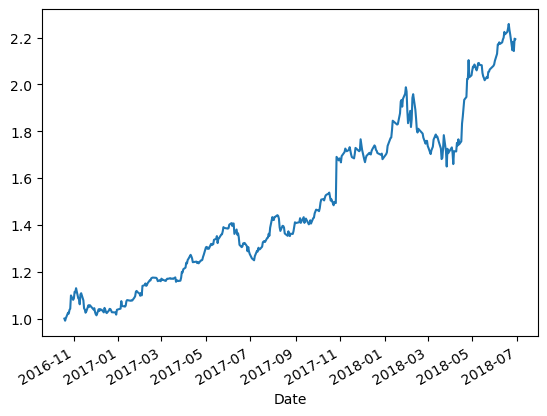

In [36]:
X_train = AMZN_neu_lag[['volalag1','AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1', 'AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1','ewa lag1', 'lag1', 'lag2', 'RSI lag1','SPYlag1','VIXlag1','EURlag1','GLDlag1']][:1628]
X_test = AMZN_neu_lag[['volalag1','AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1', 'AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1', 'ewa lag1', 'lag1', 'lag2', 'RSI lag1','SPYlag1','VIXlag1','EURlag1','GLDlag1']][1628:]
pca = PCA(n_components = 8)  # Choose number of components, 2 is the only one that give an acceptable return
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(C=1)
AMZN_neu_lag['neu_pred'][1628:] = model.fit(X_train_pca, AMZN_neu_lag['PnL'][:1628]).predict(X_test_pca)

(AMZN_neu_lag['neu_pred'] * AMZN_neu_lag['return'])[1628:].cumsum().apply(np.exp).plot()

<Axes: xlabel='Date'>

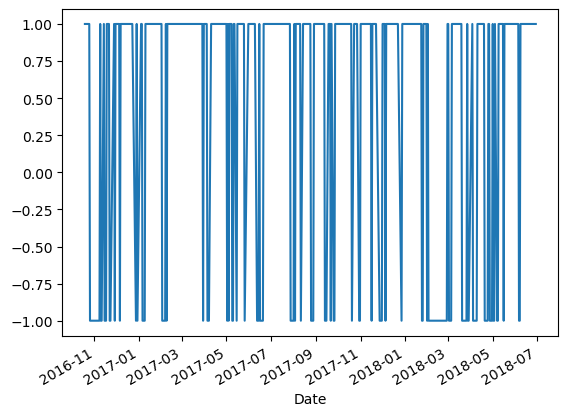

In [37]:
AMZN_neu_lag['neu_pred'][1628:].plot()

In [38]:
AMZN_test['neu_pred'] = AMZN_neu_lag['neu_pred'][1628:]
AMZN_test['volalag1'] = AMZN_neu_lag['volalag1'][1628:]
AMZN_test['volatlag1'] = rets['AMZNvolat'].shift(1)
AMZN_test['modpred'] = np.where(AMZN_test['volalag1'] > AMZN_test['volatlag1'],AMZN_test['neu_pred'],  AMZN_test['Ari_pred_dir'])
AMZN_test

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\2050081267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test['neu_pred'] = AMZN_neu_lag['neu_pred'][1628:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\2050081267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test['volalag1'] = AMZN_neu_lag['volalag1'][1628:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\2050081267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,AMZN.O,Ari_Pred_Price,Returns,Ari_pred_ret,Ari_pred_dir,Ari_ret,neu_pred,volalag1,volatlag1,modpred
Date,,,,,,,,,,
2016-10-19,817.69,817.682829,0.000049,0.005896,1.0,0.000049,1.0,0.007470,0.010370,1.0
2016-10-20,810.32,817.690049,-0.009054,0.000009,1.0,-0.009054,1.0,0.007466,0.010228,1.0
2016-10-21,818.99,810.269244,0.010643,-0.009117,-1.0,-0.010643,1.0,0.007045,0.010363,-1.0
2016-10-24,838.09,819.043305,0.023054,0.010770,1.0,0.023054,1.0,0.007854,0.010452,1.0
2016-10-25,835.18,838.244531,-0.003478,0.023173,1.0,-0.003478,1.0,0.010205,0.010865,1.0
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1663.15,1715.394583,-0.031090,-0.008395,-1.0,0.031090,1.0,0.008044,0.010418,-1.0
2018-06-26,1691.09,1661.961388,0.016660,-0.031645,-1.0,-0.016660,1.0,0.010747,0.011721,-1.0
2018-06-27,1660.51,1691.545302,-0.018249,0.017644,1.0,-0.018249,1.0,0.011787,0.010510,1.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\1992312284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test['modifiedreturn']=AMZN_test['modpred'] * AMZN_test['Returns']
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29040\1992312284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_test['arimareturn']=AMZN_test['Ari_pred_dir'] * AMZN_test['Returns']


Text(0.5, 1.0, 'AMZN')

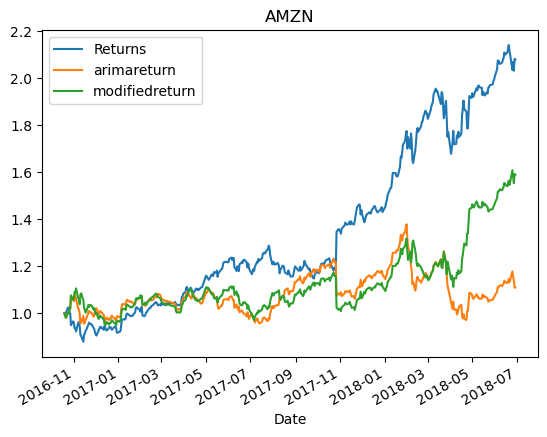

In [39]:
AMZN_test['modifiedreturn']=AMZN_test['modpred'] * AMZN_test['Returns']
AMZN_test['arimareturn']=AMZN_test['Ari_pred_dir'] * AMZN_test['Returns']
AMZN_test['Returns'].cumsum().apply(np.exp).plot()
AMZN_test['arimareturn'].cumsum().apply(np.exp).plot()
AMZN_test['modifiedreturn'].cumsum().apply(np.exp).plot()
plt.legend()
plt.title('AMZN')

In [40]:
AMZN_test[['modifiedreturn','arimareturn','Returns']].sum().apply(np.exp)

modifiedreturn    1.589718
arimareturn       1.109354
Returns           2.078885
dtype: float64

In [41]:
table=pd.DataFrame()
table['cumsum']=AMZN_test[['modifiedreturn','arimareturn','Returns']].sum().apply(np.exp)
table['cumsum1']=AMZN_test[['modifiedreturn','arimareturn','Returns']].sum()
table['stdday']=AMZN_test[['modifiedreturn','arimareturn','Returns']].std()
table['returnannual']=table['cumsum1']*252/427
table['stdannual']=table['stdday']*np.sqrt(252)
table['sharpe']=(table['returnannual']-0.01)/table['stdannual']
table

,cumsum,cumsum1,stdday,returnannual,stdannual,sharpe
modifiedreturn,1.589718,0.463557,0.015118,0.273574,0.239998,1.098235
arimareturn,1.109354,0.103778,0.015156,0.061246,0.240587,0.213004
Returns,2.078885,0.731832,0.015060,0.431901,0.239071,1.764752
